# Customer Segmentation
The decision alternatives for this analysis are whether to expand in one of two locations or not to open at either location and look into other options. Only in the case that neither of the two locations are in line with the restaurant's current customer base after analysis, we would choose the passive alternative. 

In [7]:
# taking a first look at the dataset
# import libraries
import pandas as pd
customer_survey = pd.read_csv("CustomerSurvey.tsv", sep ='\t', header=1)

In [1]:
# pull out the column descriptions
#descriptions = customer_survey.loc[0,]
#descriptions

In [8]:
# remove descriptions for clean data
df = customer_survey.drop(0)
#df.dtypes

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

df = df[df.applymap(isnumber)]
df = df.apply(pd.to_numeric)
df = df.dropna()

In [2]:
# what is the variance of each column?
#df.var()

In [10]:
select=['ImpConv',
        'Imp Value', 'Imp healthy options',
        'num eat out',
        'Compare covenience',  'Compare value ',
       'Compare healthy options']
X = df[select]
#X

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from plotnine import *

In [12]:
# unsupervised k-means clustering
# loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

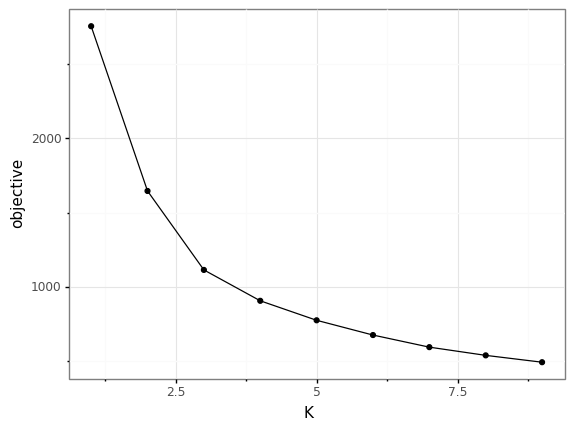

<ggplot: (136928622326)>

In [13]:
# plot the results; which K (number of clusters) is best?
plot1=(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)
plot1

# elbow principle: three clusters are sufficient enough for us to achieve the balance of 
## maximizing between-cluster variance while simultaneously minimizing within-cluster variance

In [14]:
# assign each instance to a cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustered_data = df
clustered_data['cluster'] = kmeans.labels_
clustered_data

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0


In [15]:
kmeans.cluster_centers_

array([[2.04705882, 2.24705882, 1.54117647, 2.6       , 3.21176471,
        2.24705882, 1.54117647],
       [2.51219512, 2.48780488, 5.46341463, 1.80487805, 2.48780488,
        3.95121951, 5.46341463],
       [4.03174603, 4.14285714, 1.66666667, 4.01587302, 4.44444444,
        4.14285714, 1.71428571]])

In [16]:
# Define a helper function to sort attibutes
def sorted_attr(idx, cluster_centers, column_names):
    print("*** Sorted attributes for %d ***" % idx)
    for i in sorted(range(len(column_names)), key=lambda i: -cluster_centers[idx,i]):
        print(column_names[i], cluster_centers[idx,i])

        
for i in range(0,3):  
    print(sorted_attr(i, kmeans.cluster_centers_, X.columns))

*** Sorted attributes for 0 ***
Compare covenience 3.211764705882353
num eat out 2.6000000000000005
Imp Value 2.2470588235294127
Compare value  2.2470588235294113
ImpConv 2.047058823529411
Imp healthy options 1.5411764705882351
Compare healthy options 1.5411764705882343
None
*** Sorted attributes for 1 ***
Imp healthy options 5.463414634146343
Compare healthy options 5.463414634146338
Compare value  3.9512195121951215
ImpConv 2.512195121951219
Imp Value 2.487804878048781
Compare covenience 2.48780487804878
num eat out 1.8048780487804883
None
*** Sorted attributes for 2 ***
Compare covenience 4.444444444444443
Compare value  4.142857142857143
Imp Value 4.142857142857142
ImpConv 4.031746031746032
num eat out 4.015873015873017
Compare healthy options 1.7142857142857146
Imp healthy options 1.6666666666666656
None


In [17]:
#clustered_data

In [18]:
#pd.crosstab(clustered_data.cluster, clustered_data['Imp Menu Variety'])

In [19]:
#pd.crosstab(clustered_data.cluster, [clustered_data['Imp Menu Variety'],clustered_data['Compare menu variety']])

C:\App\Aconda\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\App\Aconda\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: plot3.jpg
  warn('Filename: {}'.format(filename), PlotnineWarning)


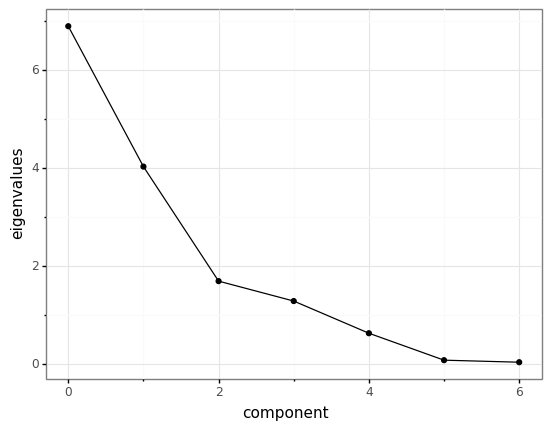

<ggplot: (-9223371899926149288)>

In [20]:
# factor analysis to narrow down the dimensions of clustering analysis 
# scree plot
from sklearn.decomposition import PCA
pca = PCA().fit(X)
scree_data = pd.DataFrame({'eigenvalues': pca.explained_variance_, 
                           'component': range(len(pca.explained_variance_))})
# plot the results; what K is best?
p3=(ggplot(scree_data)                      # defining what data to use
 + aes(x='component', y='eigenvalues')   # map variables to attributes
 + geom_point() + geom_line()            # defining the type of geometric objects to use
 + theme_bw()                            # other aestheic attributes
)

ggsave(plot=p3, filename='plot3.jpg')
p3

In [21]:
# scree plot indicates that three components is the proper amount for our factor analysis

transformer = FactorAnalysis(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(X)
sorted_attr(0, transformer.components_, X.columns)
sorted_attr(1, transformer.components_, X.columns)
sorted_attr(2, transformer.components_, X.columns)

# appears that 0 captures the variables about healthy options, 
## 1 captures variables about value, and 2 captures variables about convenience

*** Sorted attributes for 0 ***
Imp healthy options 1.7184162907135625
Compare healthy options 1.7091509952709782
Compare value  0.3865964708976616
ImpConv -0.09547896155249835
Imp Value -0.15013398002904385
Compare covenience -0.45051462408144155
num eat out -0.5455167923196186
*** Sorted attributes for 1 ***
Imp Value 1.1676544314272566
Compare value  1.1186222318847805
ImpConv 0.8318868704404423
Compare covenience 0.36576166992969994
num eat out 0.28517486132607345
Compare healthy options 0.00824442093165044
Imp healthy options -0.015369776903762877
*** Sorted attributes for 2 ***
Compare covenience 0.8018202065846215
num eat out 0.4238744733285539
ImpConv 0.39240947975655105
Compare healthy options 0.05807825612708834
Imp Value 0.0333378679353852
Imp healthy options -0.0012909859713257303
Compare value  -0.1061110153521582


In [3]:
#X_transformed

In [23]:
#sorted_attr(0, transformer.components_, X.columns)
#sorted_attr(1, transformer.components_, X.columns)

In [24]:
#transformer.components_

C:\App\Aconda\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\App\Aconda\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: cluster after FA.jpg
  warn('Filename: {}'.format(filename), PlotnineWarning)


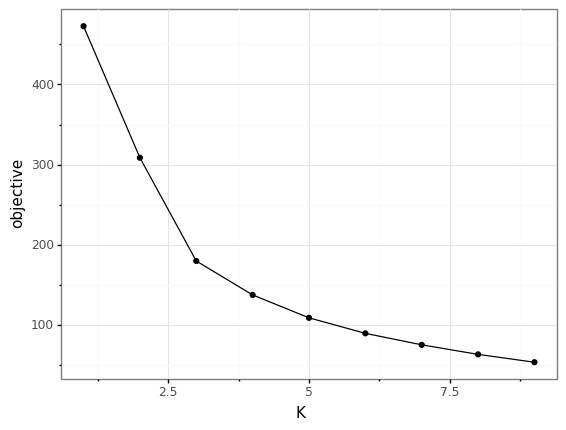

<ggplot: (136928776922)>

In [25]:
# cluster based on the factor analysis scores

# Loop over several values of K
objective = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_transformed)
    objective.append(kmeans.inertia_)

kmeans_objectives = pd.DataFrame({'K': range(1,10), 'objective': objective})

# plot the results; what K is best?
plot2=(ggplot(kmeans_objectives)     # defining what data to use
 + aes(x='K', y='objective')   # map variables to attributes
 + geom_point() + geom_line()  # defining the type of geometric objects to use
 + theme_bw()                  # other aestheic attributes
)
ggsave(plot=plot2, filename='cluster after FA.jpg', dpi=100)
plot2

In [26]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X_transformed)
clustered_data1 = df
clustered_data1['cluster'] = kmeans.labels_
clustered_data1

,obs id,num eat out,Jaes most freq,sec most freq,ImpConv,Imp Menu Variety,Imp Value,Imp healthy options,Imp taste,Imp friendly staff,...,Compare friendly staff,Compare ambiance,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,cluster
1,292,4,0,1,5.0,4.0,5.0,1.0,5.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2
2,306,4,0,1,4.0,4.0,4.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,2
3,314,2,1,0,3.0,3.0,3.0,6.0,3.0,5.0,...,5.0,4.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1
4,332,2,1,0,2.0,2.0,2.0,5.0,4.0,4.0,...,6.0,5.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,1
5,346,2,0,0,3.0,2.0,3.0,2.0,2.0,3.0,...,3.0,3.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,448,3,0,1,1.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0
198,460,3,1,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
199,461,2,0,0,1.0,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
200,462,1,0,0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2


In [27]:
kmeans.cluster_centers_

array([[-0.63489255, -1.26880085,  0.16556633],
       [ 1.75950956, -0.08742992, -0.18006147],
       [-0.41219658,  0.6839252 , -0.00914078]])

In [28]:
for i in range(0,3):
    print(i, sum(kmeans.labels_==i))

0 50
1 41
2 98


In [473]:
# gender split
test=pd.crosstab(clustered_data1.cluster, clustered_data1.gender)
test

gender,1.0,2.0
cluster,,
0,39,11
1,37,4
2,50,48


In [474]:
# gender split by proportion
test=pd.crosstab(clustered_data1.cluster, clustered_data1.gender)
test[1]=test[1]/test[1].sum()
test[2]=test[2]/test[2].sum()
test

gender,1.0,2.0
cluster,,
0,0.309524,0.174603
1,0.293651,0.063492
2,0.396825,0.761905


In [475]:
# income distribution
test2=pd.crosstab(clustered_data1.cluster, clustered_data1.income)
test2

income,1.0,2.0,3.0,4.0
cluster,,,,
0,11,24,15,0
1,0,1,20,20
2,51,34,13,0


In [464]:
# age distribution
test3=pd.crosstab(clustered_data1.cluster, clustered_data1.age)
test3

age,1.0,2.0,3.0,4.0
cluster,,,,
0,4,20,24,2
1,0,0,36,5
2,9,65,22,2


In [465]:
# household types
test3=pd.crosstab(clustered_data1.cluster, clustered_data1['hhld type'])
test3

hhld type,1.0,2.0,3.0
cluster,,,
0,14,35,1
1,0,3,38
2,31,60,7


In [466]:
#clustered_data1[clustered_data1.cluster==2]['num jaes last month'].mean()

### Cluster Demographics
Cluster 0 (Cheap Eaters): Mid-to-low income millennials with no family <br>
Cluster 1 (Health Seeker): Middle-aged, higher income females with a family (most likely Moms) <br>
Cluster 2 (Value Seeker): Young, mid-to-low income males without a family (most likely students or young workers)

### Incorporating noncustomer survey data using crosstabs

In [467]:
noncustomer_survey = pd.read_csv("NoncustomerSurvey.tsv", sep ='\t', header=1)

In [4]:
# pull out the column descriptions
#noncustomer_descriptions = noncustomer_survey.loc[0,]
#noncustomer_descriptions

In [469]:
noncustomer_survey = pd.read_csv("NoncustomerSurvey.tsv", sep ='\t', header=1)
# remove descriptions for clean data
noncustomer_df = noncustomer_survey.drop(0)

# turn the data into numbers and non-responses into NaN
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

noncustomer_df = noncustomer_df[noncustomer_df.applymap(isnumber)]
noncustomer_df = noncustomer_df.apply(pd.to_numeric)
noncustomer_df=noncustomer_df.iloc[:,1:19]
noncustomer_df

,#times/wk eat lunch/dinner out,FCR most freq,FCR sec most freq,Imp convenient,Imp menu variety,Imp value,Imp healty options,Imp taste,Imp friendly staff,Imp ambience,gender,age,income,hhld type,kids under 5,kids 5-12,kids over 12,area
1,5.0,0.0,0.0,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,3.0,0.0,0.0,5,3.0,4,1.0,5,2.0,3,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1
3,6.0,1.0,0.0,4,3.0,5,1.0,4,2.0,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,2,2.0,2,6.0,3,4.0,4,1.0,3.0,3.0,3.0,2.0,0.0,0.0,2
5,1.0,1.0,1.0,3,2.0,2,5.0,4,5.0,3,1.0,3.0,3.0,3.0,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1.0,NaN,NaN,1,3.0,1,5.0,1,5.0,3,2.0,3.0,1.0,1.0,0.0,0.0,0.0,2
177,2.0,NaN,NaN,2,2.0,1,2.0,1,2.0,2,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1
178,1.0,NaN,NaN,1,1.0,1,1.0,1,1.0,1,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2
179,5.0,NaN,NaN,4,5.0,5,2.0,6,2.0,1,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1


In [373]:
pd.crosstab(noncustomer_df.area, noncustomer_df['Imp healty options'])


Imp healty options,1.0,2.0,3.0,4.0,5.0,6.0
area,,,,,,
1,51,34,3,0,1,0
2,10,15,4,1,22,38


Except for those in the Health cluster (20% of all respondents), most customers don’t value how healthy our food is and rate us low on this attribute, so we should avoid expanding in places where people value health. Area 2 pays more attention to healthy food, which further enhances our decision in selecting Area 1.

In [380]:
pd.crosstab(noncustomer_df.area, noncustomer_df['Imp value ']) 

Imp value,1,2,3,4,5,6
area,,,,,,
1,23,9,0,20,38,0
2,22,45,21,0,1,1


From the results of survey on current customers, most customers consider value as the most important, so value is our competitive advantage. This is what we want our new potential customers to prefer when it comes to their food options as well. In general, the percentage of people who think of value important is larger in Area 1 than in Area 2.

In [381]:
pd.crosstab(noncustomer_df.area, noncustomer_df['Imp convenient'])

Imp convenient,1,2,3,4,5,6
area,,,,,,
1,16,12,3,38,20,1
2,14,50,25,1,0,0


As for convenience, our current customers are not as interested in this characteristic. Thus, their opinions on how we fare compared to our competitors in terms of convenience are not very helpful. Therefore, we tend to ignore this factor when making final decisions.

## Conclusion
Based on the segmentation analysis, the optimal choice to open the new location would be in area 2. For non-customers surveyed at the potential locations, we made crosstabulation tables to investigate how they perceived the importance of healthy food, value provided, and convenience. Combining the results from the survey on our current customers, we attempted to identify a match between our strengths and what the potential customers value. 
